# Manipulate waveform decomposition frame and find corotating angles

### Setup Environment

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup plotting backend
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
from matplotlib.pyplot import *
# Import needed packages from positive
from positive.plotting import sYlm_mollweide_plot
from positive import alert
# Import other usefuls
from os.path import expanduser
from nrutils import scsearch,gwylm
from nrutils.core.basics import *
from numpy import *

### Find a simulation

In [2]:
A = scsearch(institute='bam',keyword='q1.2_dqdcp2',verbose=True)
# A = scsearch(institute='gt',keyword='Sq4_d9_a0.6_oth.090_rr_M140',verbose=True)
# A = scsearch(q=1,keyword='hrq',verbose=True)
# A = scsearch(precessing=True,verbose=True)
# A = scsearch(keyword='EP_um2D10_d6_sz-n88')

(scsearch)>> Found institute (='bam') keyword.
(scsearch)>> Found keyword (='q1.2_dqdcp2') keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 2 possibly degenerate simulations:
[0001][silures] BAM: 1chi0.67-2chi0.42-p-q1.50	(q1.2_dqdcp2)
[0002][hogshead] dirac-nr-followup: 1chi0.67-2chi0.42-p-q1.50	(q1.2_dqdcp2)



### Load waveform data

In [4]:
y = gwylm( A[0], lmax=3, clean=True )
# y = gwylm( A[0], lm=[(2,2),(2,1),(2,0)], clean=False )

# simdir = '/Users/book/MOUNT/tmp/mnt/hogshead/NR_data/ReducedData-hogshead/q2/q2a04t90dPm1_T_96_408/'
# y = gwylm( simdir, lmax=2, clean=True )

([<matplotlib.axes._subplots.AxesSubplot at 0x10938a950>,
 <matplotlib.figure.Figure at 0x103c39cd0>)

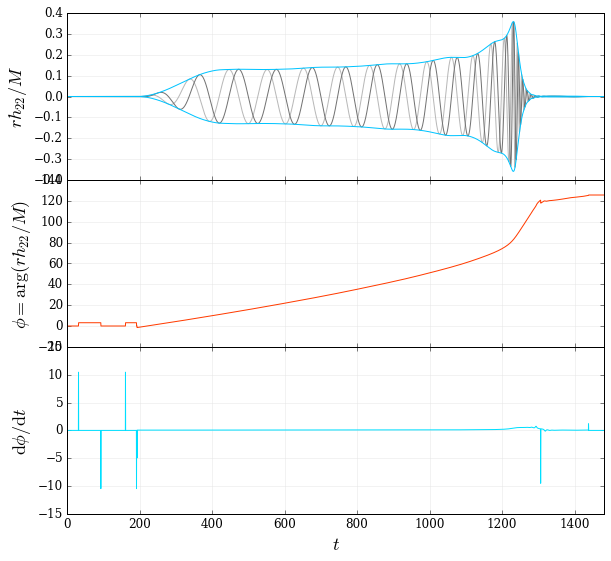

In [5]:
y.lm[2,2]['strain'].plot()

### Try to calculate corotating angles

In [6]:

# Options
kind = 'psi4'
domain = 'time'

# Construct dictionary of multipoles using all multipoles available
mp = { (l,m) : ( y.lm[l,m][kind].y if domain in ('t','time') else y.lm[l,m][kind].fd_y ) for l,m in y.lm  }
domain_vals = y.lm[2,2][kind].t if domain in ('t','time') else y.lm[2,2][kind].f

# Calculate corotating angles using low-level function
alpha,beta,gamma = calc_coprecessing_angles( mp, domain_vals )
x,yy,z            = calc_coprecessing_angles( mp, domain_vals, return_xyz=True )


### Plot the angles and the waveform amplitude for reference

(425.55000000000001, 1374.0)

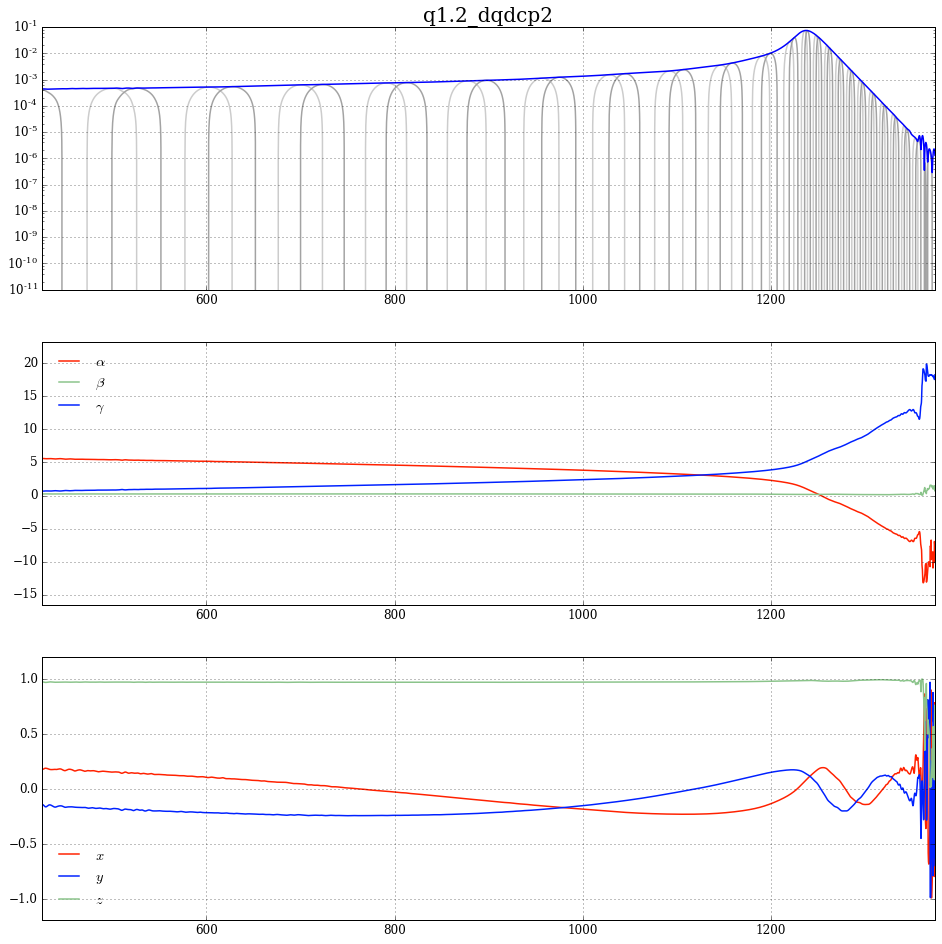

In [9]:

#
fig = figure( figsize=4*figaspect(1) )
clr = rgb(3,jet=True); grey = ones(3)*0.8
lw = 1.5

#
domain_min = domain_vals[y.preinspiral.right_index] if domain in ('t','time') else y.wstart_pn/(2*pi)
domain_max = domain_vals[y.postringdown.left_index] if domain in ('t','time') else y.lm[2,2][kind].dt

#
mask = (domain_vals>=domain_min) & (domain_vals<=domain_max)

#
ax = subplot(3,1,1)
title( y.simname )
if domain in ('t','time'):
    plot( domain_vals, y.lm[2,2][kind].plus, color=grey, linewidth = lw )
    plot( domain_vals, y.lm[2,2][kind].cross, color=0.8*grey, linewidth = lw )
    plot( domain_vals, y.lm[2,2][kind].amp, linewidth = lw )
    yscale('log')
else:
    plot( domain_vals, y.lm[2,2][kind].fd_amp, linewidth = lw )
    xscale('log'); yscale('log')
    ylim( lim(y.lm[2,2][kind].fd_amp[mask]) )
grid()

#
subplot(3,1,2,sharex=ax)
reshift = lambda V: V - V[mask][0] + mod(V[mask][0],2*pi)
plot( domain_vals, reshift(alpha), color = clr[0], linewidth = lw, label=r'$\alpha$' )
plot( domain_vals, reshift(beta),  color = clr[1], linewidth = lw, label=r'$\beta$' )
plot( domain_vals, reshift(gamma), color = clr[2], linewidth = lw, label=r'$\gamma$' )
legend( frameon=False, loc='best' )
ylim( lim( hstack([reshift(alpha)[mask],reshift(beta)[mask],reshift(gamma)[mask]]), dilate=0.1 ) )
grid()

#
subplot(3,1,3,sharex=ax)
plot( domain_vals, x, color = clr[0], linewidth = lw, label=r'$x$' )
plot( domain_vals, yy,  color = clr[2], linewidth = lw, label=r'$y$' )
plot( domain_vals, z, color = clr[1], linewidth = lw, label=r'$z$' )
legend( frameon=False, loc='best' )
ylim( lim( hstack([x[mask],yy[mask],z[mask]]), dilate=0.1 ) )
grid()

#
ax.set_xlim( [ domain_min, domain_max ] )